In [1]:
#Import Wrangling libraies 
import pandas as pd
import numpy  as np

#Import Visualization Libraries 
import seaborn as sns
import matplotlib.pyplot as plt

#Statistical Computations
from scipy.stats import t

from skimpy import skim

In [2]:
#I imported the previous Data set i used in Task 1 since i have alredy optimizeed it
QVI = pd.read_csv('QVI_data.csv', parse_dates=True)
skim(QVI)

╭───────────────────────────────────── skimpy summary ──────────────────────────────────────╮
│          Data Summary                Data Types                                           │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━┳━━━━━━━┓                                    │
│ ┃ dataframe         ┃ Values ┃ ┃ Column Type ┃ Count ┃                                    │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━╇━━━━━━━┩                                    │
│ │ Number of rows    │ 264834 │ │ int64       │ 6     │                                    │
│ │ Number of columns │ 12     │ │ object      │ 5     │                                    │
│ └───────────────────┴────────┘ │ float64     │ 1     │                                    │
│                                └─────────────┴───────┘                                    │
│                                          number                                           │
│ ┏━━━━━━━━┳━━━━━━━━┳━━━━━━━━━┳━━━━━━━━┳━━━━━━━┳━━━━━━┳━━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━━━┓  │
│ ┃        ┃ missin ┃ complet ┃ mean   ┃ sd    ┃ p0   ┃ p25   ┃ p75    ┃ p100   ┃ hist   ┃  │
│ ┃        ┃ g      ┃ e rate  ┃        ┃       ┃      ┃       ┃        ┃        ┃        ┃  │
│ ┡━━━━━━━━╇━━━━━━━━╇━━━━━━━━━╇━━━━━━━━╇━━━━━━━╇━━━━━━╇━━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━━━┩  │
│ │ LYLTY_ │      0 │       1 │ 140000 │ 81000 │ 1000 │ 70000 │ 200000 │ 240000 │   █    │  │
│ │ CARD_N │        │         │        │       │      │       │        │      0 │        │  │
│ │ BR     │        │         │        │       │      │       │        │        │        │  │
│ │ STORE_ │      0 │       1 │    140 │    77 │    1 │    70 │    200 │    270 │ ▇██▇▇▇ │  │
│ │ NBR    │        │         │        │       │      │       │        │        │        │  │
│ │ TXN_ID │      0 │       1 │ 140000 │ 78000 │    1 │ 68000 │ 200000 │ 240000 │   █    │  │
│ │        │        │         │        │       │      │       │        │      0 │        │  │
│ │ PROD_N │      0 │       1 │     57 │    33 │    1 │    28 │     85 │    110 │ ▇█▇▇▇▇ │  │
│ │ BR     │        │         │        │       │      │       │        │        │        │  │
│ │ PROD_Q │      0 │       1 │    1.9 │  0.34 │    1 │     2 │      2 │      5 │   ▁█   │  │
│ │ TY     │        │         │        │       │      │       │        │        │        │  │
│ │ TOT_SA │      0 │       1 │    7.3 │   2.5 │  1.5 │   5.4 │    9.2 │     30 │  ▅█▁   │  │
│ │ LES    │        │         │        │       │      │       │        │        │        │  │
│ │ PACK_S │      0 │       1 │    180 │    64 │   70 │   150 │    180 │    380 │ ▂█▆▁▁▁ │  │
│ │ IZE    │        │         │        │       │      │       │        │        │        │  │
│ └────────┴────────┴─────────┴────────┴───────┴──────┴───────┴────────┴────────┴────────┘  │
╰─────────────────────────────────────────── End ───────────────────────────────────────────╯

In [3]:
QVI.info()
#Keeping Original Data, Create a duplicate 
QVI_data = QVI.copy()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264834 entries, 0 to 264833
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   LYLTY_CARD_NBR    264834 non-null  int64  
 1   DATE              264834 non-null  object 
 2   STORE_NBR         264834 non-null  int64  
 3   TXN_ID            264834 non-null  int64  
 4   PROD_NBR          264834 non-null  int64  
 5   PROD_NAME         264834 non-null  object 
 6   PROD_QTY          264834 non-null  int64  
 7   TOT_SALES         264834 non-null  float64
 8   PACK_SIZE         264834 non-null  int64  
 9   BRAND             264834 non-null  object 
 10  LIFESTAGE         264834 non-null  object 
 11  PREMIUM_CUSTOMER  264834 non-null  object 
dtypes: float64(1), int64(6), object(5)
memory usage: 24.2+ MB


In [4]:
#Filter the ranges needed Dates needed. Recall that we need a range of July 2018 to beginning of feburary 2019
#fIRST CONVERT DATE TO DATEIME FORMAT

#Group at a monthly level

#Conver Date to DateTime  format
QVI_data['DATE']     = pd.to_datetime(QVI_data['DATE'])

#Add yearMonth columns
QVI_data['period']   = QVI_data['DATE'].dt.month_name() + QVI_data['DATE'].dt.year.astype(str)
QVI_data['DATE']     = pd.to_datetime(QVI_data['period'].astype(str), format = '%B%Y')
QVI_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264834 entries, 0 to 264833
Data columns (total 13 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   LYLTY_CARD_NBR    264834 non-null  int64         
 1   DATE              264834 non-null  datetime64[ns]
 2   STORE_NBR         264834 non-null  int64         
 3   TXN_ID            264834 non-null  int64         
 4   PROD_NBR          264834 non-null  int64         
 5   PROD_NAME         264834 non-null  object        
 6   PROD_QTY          264834 non-null  int64         
 7   TOT_SALES         264834 non-null  float64       
 8   PACK_SIZE         264834 non-null  int64         
 9   BRAND             264834 non-null  object        
 10  LIFESTAGE         264834 non-null  object        
 11  PREMIUM_CUSTOMER  264834 non-null  object        
 12  period            264834 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(6), object(5)
memor

In [5]:
#Drop Irrelevat Columns while still maintaing original Data set
cols2drop      = ['PROD_NBR','PROD_NAME', 'PACK_SIZE', 'BRAND', 'LIFESTAGE', 'PREMIUM_CUSTOMER', 'period']
QVI_DROPPED    = QVI_data.drop(columns=cols2drop).sort_values('DATE').reset_index(drop = True)

#Preview
QVI_DROPPED.head()

,LYLTY_CARD_NBR,DATE,STORE_NBR,TXN_ID,PROD_QTY,TOT_SALES
0,84225,2018-07-01,84,83876,2,8.8
1,115393,2018-07-01,115,118997,2,4.2
2,115389,2018-07-01,115,118994,1,4.2
3,70067,2018-07-01,70,67872,2,5.2
4,208030,2018-07-01,208,206272,2,3.0


#### DEFINING METRICS FOR EVALUATING CONTROL STORE BEFORE THE TRIAL PERIOD 

### METRICS

- TOTAL SALES : 
    This is indicative of the net sales made during the perid 
- NUMBER OF CUSTOMERS : 
    This metric will indicate the number of unique customers every store had during the period
- CHIPS PER TRANSACTION : 
    This will show the distribution of chip for each customer
- TRANSACTION PER CUSTOMER : 
    This will show the distribution of Ttransaction per customer 
- AVERAGE UNIT PRICE : 
    This metric becomes important such that it will closely relate the the kind of products(Brands and Weight together)

In [6]:
measureOverTime = QVI_DROPPED.groupby(['STORE_NBR','DATE']).agg({'TOT_SALES' : 'sum' , 
                                                            'LYLTY_CARD_NBR' : 'nunique', 
                                                                    'TXN_ID' : 'nunique', 
                                                                  'PROD_QTY' :'sum'}).reset_index().rename(
                                                  columns= {'LYLTY_CARD_NBR' : 'NO_OF_CUSTOMERS', 
                                                                     'TXN_ID': 'NO_OF_TRANSC',
                                                                   'PROD_QTY':'NET_CHIP_QTY' }) 

#Transactions per Customer
measureOverTime['CHIPS_PER_CUSTOMER']  = measureOverTime['NET_CHIP_QTY']/measureOverTime['NO_OF_CUSTOMERS']
#Average Unit cost of products
measureOverTime['Ave_unit_Cost']       = measureOverTime['TOT_SALES']/measureOverTime['NET_CHIP_QTY']
#Average number of Chips per transaction
measureOverTime['chips_per_transc']    = measureOverTime['NET_CHIP_QTY']/measureOverTime['NO_OF_TRANSC']

#Drop primary metrics used to derive the secondary 
measureOverTime =   measureOverTime.drop(columns= ['NO_OF_TRANSC','NET_CHIP_QTY'])

In [7]:
# Group by Store and Period pretrial Period
# Select only Dates that occur before the start of trial date 
start_of_trial      = '2019-02-01'
end_of_trial        = '2019-05-01'
preTrialMeasures    = measureOverTime[measureOverTime['DATE'] < start_of_trial]

In [8]:
storeObs = pd.DataFrame(QVI_DROPPED.groupby(['STORE_NBR','DATE']).agg({'TOT_SALES' : 'sum'}).reset_index())['STORE_NBR'].value_counts()
#The period before the testing period has 12Months form July 2018 to June 2019
#In Such a manner, i want to find all Store that does have sales for 12 months during this period
storesWithFullObs = list(storeObs.index[storeObs == 12])
storesWithFullObs.sort()

In [9]:
storesWithFullObs

[1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 61,
 62,
 63,
 64,
 65,
 66,
 67,
 68,
 69,
 70,
 71,
 72,
 73,
 74,
 75,
 77,
 78,
 79,
 80,
 81,
 82,
 83,
 84,
 86,
 87,
 88,
 89,
 90,
 91,
 93,
 94,
 95,
 96,
 97,
 98,
 99,
 100,
 101,
 102,
 103,
 104,
 105,
 106,
 107,
 108,
 109,
 110,
 111,
 112,
 113,
 114,
 115,
 116,
 118,
 119,
 120,
 121,
 122,
 123,
 124,
 125,
 126,
 127,
 128,
 129,
 130,
 131,
 132,
 133,
 134,
 135,
 136,
 137,
 138,
 139,
 140,
 141,
 142,
 143,
 144,
 145,
 146,
 147,
 148,
 149,
 150,
 151,
 152,
 153,
 154,
 155,
 156,
 157,
 158,
 159,
 160,
 161,
 162,
 163,
 164,
 165,
 166,
 167,
 168,
 169,
 170,
 171,
 172,
 173,
 174,
 175,
 176,
 177,
 178,
 179,
 180,
 181,
 182,
 183,
 184,
 185,
 186,
 187,
 188,
 189,
 190,
 191

In [10]:
#Use only stores that have Complete Months for the pretrial
preTrialMeasures = preTrialMeasures[preTrialMeasures['STORE_NBR'].isin(storesWithFullObs)]
preTrialMeasures.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1820 entries, 0 to 3163
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   STORE_NBR           1820 non-null   int64         
 1   DATE                1820 non-null   datetime64[ns]
 2   TOT_SALES           1820 non-null   float64       
 3   NO_OF_CUSTOMERS     1820 non-null   int64         
 4   CHIPS_PER_CUSTOMER  1820 non-null   float64       
 5   Ave_unit_Cost       1820 non-null   float64       
 6   chips_per_transc    1820 non-null   float64       
dtypes: datetime64[ns](1), float64(4), int64(2)
memory usage: 113.8 KB


In [11]:
#Preview 
preTrialMeasures.head()

,STORE_NBR,DATE,TOT_SALES,NO_OF_CUSTOMERS,CHIPS_PER_CUSTOMER,Ave_unit_Cost,chips_per_transc
0,1,2018-07-01,206.9,49,1.265306,3.337097,1.192308
1,1,2018-08-01,176.1,42,1.285714,3.261111,1.255814
2,1,2018-09-01,278.8,59,1.271186,3.717333,1.209677
3,1,2018-10-01,188.1,44,1.318182,3.243103,1.288889
4,1,2018-11-01,192.6,46,1.239130,3.378947,1.212766


In [12]:
print(f'THERE ARE {preTrialMeasures.STORE_NBR.nunique()} STORES THAT PASSED THE CRITERIA FOR COMPLETNESS')

THERE ARE 260 STORES THAT PASSED THE CRITERIA FOR COMPLETNESS


TRIAL STORES ARE STORE_NBR 77, 86, 88

### FUNCTIONS FOR EVALUATING METRICS 

- CORRELATION : How closely related both Stores are 
- STANDARDIZED MAGNITUDE DISTANCE : the differene between each performance metric for each store

In [13]:
#CORRELATION
'''
Trial Store : of which is bein compared to 
trial_store_vars  : values saved for the trial store
target_store_vars : values saev fpr the other sore being compared to the trial store
corrTable         : correlation table 
SMDtable          : STANDARDIZED MAGNITUDE DISTANCE(SMD)
'''
def corr(df, trial_store, metric):
    #Create a Dataframe for the output values 
    corrTable = pd.DataFrame({'Trial_Store': [], 'STORE_NBR': [], 'Correlation': []})
    
    trial_store_vars = df.loc[df['STORE_NBR'] == trial_store, metric]    #Create a place holder that holds all values for target trial store
    trial_store_vars.reset_index(drop = True, inplace = True)            #reset index to drop the numbering 
    
    #iterate over the the list of valid stores  
    for store_no in storesWithFullObs:
        target_store_vars = df.loc[df['STORE_NBR'] == store_no, metric]
        target_store_vars.reset_index(drop = True, inplace = True)
        corrTable = corrTable.append({'Store1': trial_store, 'Store2': store_no, 'Correlation': target_store_vars.corr(trial_store_vars)}, ignore_index = True)
    return corrTable

In [14]:
# STANDARDIZED MAGNITUDE DISTANCE(SMD)
def standadizedMagnitudeDistance(df, trial_store, metric):
    #Create a Dataframe for the output values
    SMDtable = pd.DataFrame({'Trial_Store': [], 'STORE_NBR': [], 'SMD' : []})
    
    trial_store_vars = df.loc[df['STORE_NBR'] == trial_store, metric]         #Create a place holder that holds all values for target trial store
    trial_store_vars.reset_index(drop = True, inplace = True)                 #reset index to drop the numbering
    
    #iterate over the the list of valid stores 
    for store_no in storesWithFullObs:
        target_store_vars = df.loc[inputTable['STORE_NBR'] == store_no, metric]
        target_store_vars.reset_index(drop = True, inplace = True)
        abs_diff = abs(trial_store_vars - target_store_vars)
        smd = np.mean(1-(abs_diff-min(abs_diff))/(max(abs_diff)-min(abs_diff)))
        SMDtable = SMDtable.append({'Store1': trial_store, 'Store2': store_no, 'Magnitude': smd}, ignore_index = True)
    return SMDtable

In [15]:
#i complied both processes into one 
#Notice that both process have alot of reouuring proceeses, this will futher speed up the prcessing time considring working with a larger dataset 

def combined(df, trial_store, metric):
    #Create a Dataframe for the output values 
    ave_score_metric = 'ave_score'+metric
    combined_table = pd.DataFrame({'Trial_Store': [], 'STORE_NBR': [], 'Correlation': [], 'SMD' : [] , ave_score_metric: [] })
    
    trial_store_vars = df.loc[df['STORE_NBR'] == trial_store, metric]         #Create a place holder that holds all values for target trial store
    trial_store_vars.reset_index(drop = True, inplace = True)                 #reset index to drop the numbering
    
    #iterate over the the lsit of valid stores  
    for store_no in storesWithFullObs:
        
        #Attain values for target store  
        target_store_vars = df.loc[df['STORE_NBR'] == store_no, metric]
        target_store_vars.reset_index(drop = True, inplace = True)
        
        #Calculate the correlation
        corr_var = target_store_vars.corr(trial_store_vars)
    
        #Calculate the SMD value 
        target_store_vars = df.loc[df['STORE_NBR'] == store_no, metric]
        target_store_vars.reset_index(drop = True, inplace = True)
        abs_diff = abs(trial_store_vars - target_store_vars)
        smd = np.mean(1-(abs_diff-min(abs_diff))/(max(abs_diff)-min(abs_diff)))
        
        #Find average of both metrics to attain a scre consideing correlation and SMD have equal weights
        ave = (corr_var + smd)/2
        #if it is assumed that one metric has more weight than the other, use a wighted weighted average
        #ave = ((weightx * x ) + (weigthy*y))/(x+y)
        
        #Add to combined table 
        combined_table = combined_table.append({'Trial_Store': trial_store, 
                                                'STORE_NBR': store_no, 
                                                'Correlation': corr_var,
                                                 'SMD': smd,
                                                 ave_score_metric : ave}, ignore_index = True)  
    return combined_table

In [16]:
metrics = ['TOT_SALES','NO_OF_CUSTOMERS'] #,'TRANSC_PER_CUSTOMER','Ave_unit_Cost','chips_per_transc'
for metric in metrics:
    table = combined(preTrialMeasures,77, metric)
    table = table.drop(columns=['Correlation','SMD'])
    if metric == 'TOT_SALES':
        table_combined = table
    else:
        table_combined = pd.merge(table_combined,table, on=['Trial_Store',"STORE_NBR"])    
table_combined.head()

,Trial_Store,STORE_NBR,ave_scoreTOT_SALES,ave_scoreNO_OF_CUSTOMERS
0,77.0,1.0,0.241691,0.493017
1,77.0,2.0,0.163520,-0.050311
2,77.0,3.0,0.664779,0.662002
3,77.0,4.0,0.190817,0.101310
4,77.0,5.0,0.202834,0.441632


In [17]:
#Columns to be added 
cols = table_combined.columns
cols = cols[cols.str.contains('ave_score')]
cols

Index(['ave_scoreTOT_SALES', 'ave_scoreNO_OF_CUSTOMERS'], dtype='object')

In [18]:
#COMPUTE RESULTANT SCORE
table_combined['resultant_score'] = table_combined[cols].mean(axis = 1)
table_combined = table_combined.sort_values('resultant_score', ascending=False)
table_combined.drop(columns=cols).head()

,Trial_Store,STORE_NBR,resultant_score
221,77.0,233.0,0.756949
67,77.0,71.0,0.726310
79,77.0,84.0,0.685986
111,77.0,119.0,0.682887
108,77.0,115.0,0.676751


In [19]:
a= table_combined[table_combined.resultant_score == table_combined.resultant_score.max()].reset_index(drop = True)['STORE_NBR'][0]
int(a)

233

233, 50, 162, 71, 119 are the stores that are most correlated with 77 by our ealier defined metrics().
With this, I would be choosing  the most correlated with 77 wich is STORE 223 to compare the results over the entire period

COMPARING THE DIFFERENCE BETWEEN STORE 77 AND STORE 176
- Visually inspect if total sales if today sales in theses are closely correlated 
- Compare with other store with other score 
- If cloely correlated, compare with trial period 
- If variation exist during trial period, find the driver with visualization 
        - units sold
        - more customers
        - more purchases
        - more purchases per customer
        - more quantities per customer

In [20]:
def store_type(store_no):
    '''
    This is a function for assigning store type 
    '''
    if store_no == trial_store:
        return 'Trial Store'
    elif store_no == control_store:
        return 'Control Store'
    else:
        return 'Other Stores'   

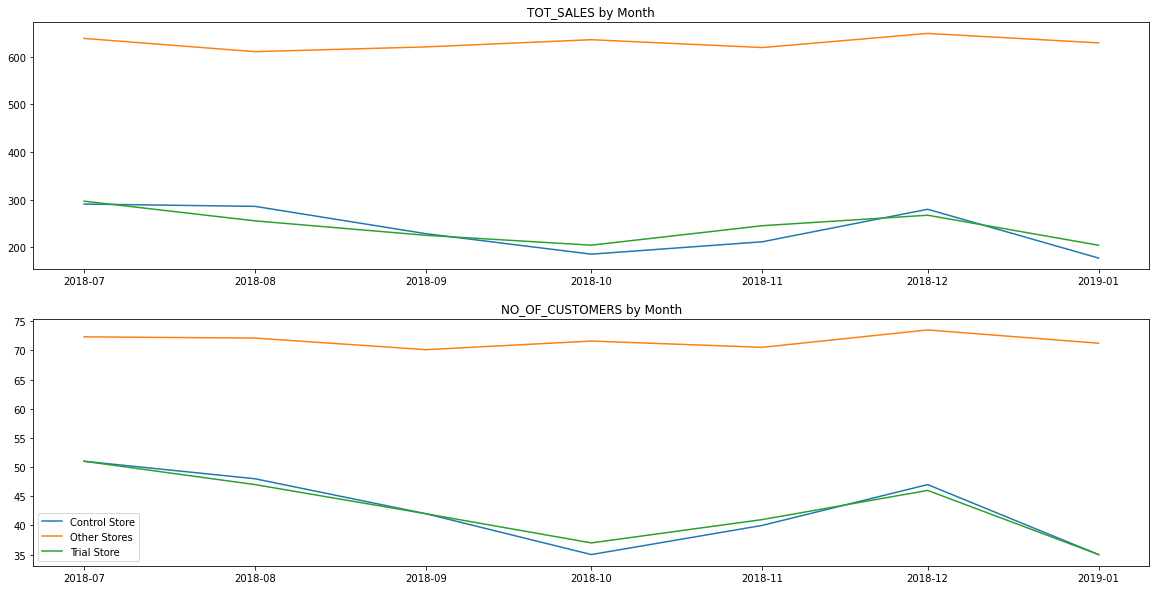

In [21]:
trial_store   = 77
control_store = 233
preTrialMeasures['Store_Type'] =  preTrialMeasures.STORE_NBR.apply(store_type)
#make a copy of the preTrialMeasures to compute for store 77
preTrialMeasures77             =  preTrialMeasures.copy()
#preTrialMeasures77['period']  = pd.to_datetime(sales_and_customers['period'].astype(str), format = '%B%Y')
preTrialMeasures77             = preTrialMeasures77.sort_values('DATE')

xgroup_by = preTrialMeasures77.groupby(['DATE','Store_Type'])
        
figure , axes = plt.subplots(2,1, figsize = (20,10))
plots = {1:'TOT_SALES', 2:'NO_OF_CUSTOMERS'}

for i in plots.keys():
    data      = pd.DataFrame(xgroup_by[plots[i]].mean().reset_index())
    plot_data = pd.pivot_table(data, index = 'DATE', columns = 'Store_Type', values = plots[i])
    axes[i-1].plot(plot_data)
    axes[i-1].set_title(f'{plots[i]} by Month')
 
plt.legend(plot_data.columns)

Over the Control Peroid, both stores had a high correlation in the amount of sales and customers  

## ASSESSMENT OF TRIAL - STORE 77
 

In [22]:
#Create a Dataframe of measure of pretrial period for trial and control stores 
preTRIALS = preTrialMeasures[preTrialMeasures['STORE_NBR'].isin([trial_store,control_store])].sort_values(['STORE_NBR', 'DATE'])

#Create a Dataframe of mesure overtime for trial and control stores
measureovertime_77               =  measureOverTime[measureOverTime['STORE_NBR'].isin([trial_store,control_store])].sort_values(['STORE_NBR', 'DATE']).reset_index(drop = True)
measureovertime_77['Store_Type'] =  measureovertime_77.STORE_NBR.apply(store_type)
measureovertime_77

,STORE_NBR,DATE,TOT_SALES,NO_OF_CUSTOMERS,CHIPS_PER_CUSTOMER,Ave_unit_Cost,chips_per_transc,Store_Type
0,77,2018-07-01,296.8,51,1.647059,3.533333,1.527273,Trial Store
1,77,2018-08-01,255.5,47,1.574468,3.452703,1.541667,Trial Store
2,77,2018-09-01,225.2,42,1.666667,3.217143,1.590909,Trial Store
3,77,2018-10-01,204.5,37,1.405405,3.932692,1.368421,Trial Store
4,77,2018-11-01,245.3,41,1.634146,3.661194,1.522727,Trial Store
5,77,2018-12-01,267.3,46,1.565217,3.712500,1.500000,Trial Store
6,77,2019-01-01,204.4,35,1.857143,3.144615,1.666667,Trial Store
7,77,2019-02-01,235.0,45,1.644444,3.175676,1.644444,Trial Store
8,77,2019-03-01,278.5,50,1.640000,3.396341,1.490909,Trial Store
9,77,2019-04-01,263.5,47,1.659574,3.378205,1.625000,Trial Store


### STORE 77 ASESSMENT OF TOTAL SALES
We will begin with scaling the control store's sales to a level similar to control for any differences between the two stores outside of the trial period

#### Scale pre-trial control sales to match pre-trial trial store sales

In [23]:
#Compute Scaling factor
scalingFactorSales = preTRIALS.TOT_SALES[preTRIALS['STORE_NBR'] == trial_store].sum()/preTRIALS.TOT_SALES[preTRIALS['STORE_NBR'] == control_store].sum()
scalingFactorSales

1.023617303289553

In [24]:
#### Apply the scaling factor
measureOverTimeSales77                      = measureovertime_77[['DATE','TOT_SALES']][measureovertime_77.STORE_NBR == control_store].copy()
measureOverTimeSales77['Controld_SALES']    = measureOverTimeSales77['TOT_SALES'] * scalingFactorSales

In [25]:
percentageDiff = pd.merge(measureOverTimeSales77.drop(columns='TOT_SALES'), 
                          measureovertime_77[['DATE','TOT_SALES']][measureovertime_77.STORE_NBR == trial_store].rename(columns={'TOT_SALES':'Trial_sales'}),
                          on = 'DATE' )

#Compute the percentage difference 
percentageDiff['percentageDiff'] = abs(percentageDiff.Controld_SALES - percentageDiff.Trial_sales) / percentageDiff.Controld_SALES
percentageDiff

,DATE,Controld_SALES,Trial_sales,percentageDiff
0,2018-07-01,297.565550,296.8,0.002573
1,2018-08-01,292.652187,255.5,0.126950
2,2018-09-01,233.998916,225.2,0.037602
3,2018-10-01,190.085733,204.5,0.075830
4,2018-11-01,216.597421,245.3,0.132516
5,2018-12-01,286.408121,267.3,0.066716
6,2019-01-01,181.692071,204.4,0.124980
7,2019-02-01,249.762622,235.0,0.059107
8,2019-03-01,203.802205,278.5,0.366521
9,2019-04-01,162.345704,263.5,0.623080


#### We will test with a null hypothesis of there being 0 difference between trial and control stores
As our null hypothesis is that the trial period is the same as the pre-trial period, let's take the standard deviation based on the scaled percentage difference in the pre-trial period

In [26]:
#Find The Standard deviation of the percentageDiff before the start of the trial period 
stdDev = np.std(percentageDiff[percentageDiff['DATE'] < start_of_trial]['percentageDiff'])
stdDev

0.046236161851401725

In [27]:

percentageDiff['tValue'] =  (percentageDiff['percentageDiff'] - 0) / stdDev

#Now, Lets view the tValue for months during the trial period 
percentageDiff['tValue'][(percentageDiff['DATE'] >= start_of_trial) & (percentageDiff['DATE'] < end_of_trial)]
'''
We can observe that the t-value is much larger than the 95th percentile value of
the t-distribution for March and April - i.e. the increase in sales in the trial
store in March and April is statistically greater than in the control store
'''

'\nWe can observe that the t-value is much larger than the 95th percentile value of\nthe t-distribution for March and April - i.e. the increase in sales in the trial\nstore in March and April is statistically greater than in the control store\n'

In [28]:
#### Note that there are 8 months in the pre-trial period but there are really 7 months in the pri trial peeriod from mmy computations
#### hence 8 - 1 = 7 degrees of freedom
dof = 7

# Find the 95th percentile of the t distribution with dof = 7
t.isf(0.05, dof)

# Comment: We can see that the t-value is much larger than the 95th percentile value of the t-distribution for March and April


1.8945786050613054

In [29]:
measureOverTimeSales = pd.pivot_table(measureovertime_77, index = 'DATE', columns = 'Store_Type', values = 'TOT_SALES')
measureOverTimeSales.head()

# Create two new columns under 'controlSales' which calculates the 5% and 95% confidence interval
measureOverTimeSales['Control 95th % confidence interval']  =  measureOverTimeSales['Control Store'] * (1 + stdDev * 2)
measureOverTimeSales['Control 5th % confidence interval' ]  =  measureOverTimeSales['Control Store'] * (1 - stdDev * 2)

In [30]:
#Preview
measureOverTimeSales.head()

Store_Type,Control Store,Trial Store,Control 95th % confidence interval,Control 5th % confidence interval
DATE,,,,
2018-07-01,290.7,296.8,317.581705,263.818295
2018-08-01,285.9,255.5,312.337837,259.462163
2018-09-01,228.6,225.2,249.739173,207.460827
2018-10-01,185.7,204.5,202.872111,168.527889
2018-11-01,211.6,245.3,231.167144,192.032856


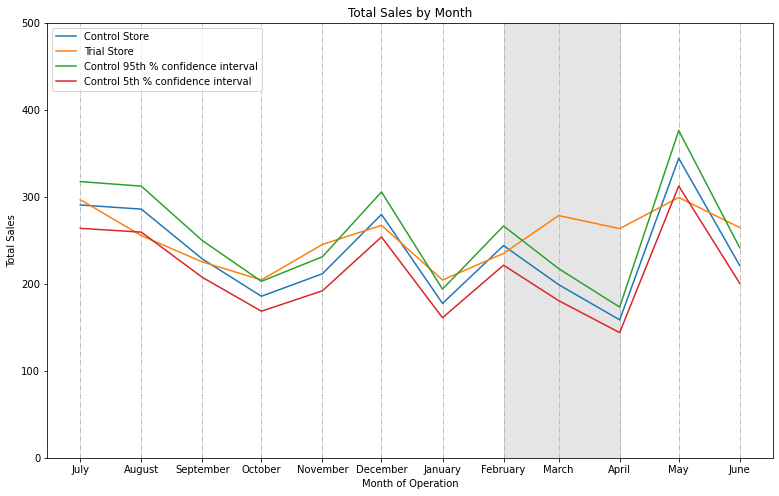

In [31]:
'Make Visual'
#Set Size
plt.figure(figsize =(13,8))

#Plot
plt.plot(measureOverTimeSales)

# Set graph title and axis title
plt.title('Total Sales by Month')
plt.xlabel('Month of Operation')
plt.xticks(measureOverTimeSales.index, labels = measureOverTimeSales.index.month_name())
plt.ylabel('Total Sales')
plt.ylim((0, 500))
plt.legend(measureOverTimeSales.columns)

# Highlight trial period
plt.axvspan(start_of_trial, '2019-04-01', color = 'grey', alpha = 0.2)
plt.grid(axis = 'x', linestyle = 'dashdot')

plt.show()

The results show that the trial in store 77 is significantly different to its control store(233) in the trial period as the trial store performance(Total Sales) lies outside the 5% to 95% confidence interval of the control store in two of the three trial months.

In [32]:
#Considering the same sequence is to be followed for no of customers and re-iterated,i combined the entire approoach using a procedural appraoch 
#OOP approach would be used if this was a constant probled faced by client(I'll be happy to conver this to an OOP if given time)
#Thus only specific variable name can be used and must be followed in the same sequence
def combined(df, trial_store, metric):
    '''
    FUNCTIONS EVALUATS METRICS 
    - CORRELATION : How closely related both Stores are 
    - STANDARDIZED MAGNITUDE DISTANCE : the differene between each performance metric for each store
    i complied both processes into one 
    Notice that both process have alot of reouuring proceeses, this will futher speed up the prcessing time considring working with a larger dataset 
    '''
    #Create a Dataframe for the output values 
    ave_score_metric = 'ave_score'+ metric
    combined_table = pd.DataFrame({'Trial_Store': [],
                                     'STORE_NBR': [],
                                   'Correlation': [], 
                                          'SMD' : [] , 
                                ave_score_metric: [] })
    
    trial_store_vars = df.loc[df['STORE_NBR'] == trial_store, metric]         #Create a place holder that holds all values for target trial store
    trial_store_vars.reset_index(drop = True, inplace = True)                 #reset index to drop the numbering
    
    #iterate over the the lsit of valid stores  
    for store_no in storesWithFullObs:
        
        #Attain values for target store  
        target_store_vars = df.loc[df['STORE_NBR'] == store_no, metric]
        target_store_vars.reset_index(drop = True, inplace = True)
        
        #Calculate the correlation
        corr_var = target_store_vars.corr(trial_store_vars)
    
        #Calculate the SMD value 
        target_store_vars = df.loc[df['STORE_NBR'] == store_no, metric]
        target_store_vars.reset_index(drop = True, inplace = True)
        abs_diff = abs(trial_store_vars - target_store_vars)
        smd = np.mean(1-(abs_diff-min(abs_diff))/(max(abs_diff)-min(abs_diff)))
        
        #Find average of both metrics to attain a scre consideing correlation and SMD have equal weights
        ave = (corr_var + smd)/2
        #if it is assumed that one metric has more weight than the other, use a wighted weighted average
        #ave = ((weightx * x ) + (weigthy*y))/(x+y)
        
        #Add to combined table 
        combined_table = combined_table.append({'Trial_Store': trial_store, 
                                                'STORE_NBR': store_no, 
                                                'Correlation': corr_var,
                                                 'SMD': smd,
                                                 ave_score_metric : ave}, ignore_index = True)  
    return combined_table


def evalMetrics(trial_store):
    '''
    THis functiion soc
    '''
    metrics = ['TOT_SALES','NO_OF_CUSTOMERS'] 
    for metric in metrics:
        table = combined(preTrialMeasures,trial_store, metric)
        table = table.drop(columns=['Correlation','SMD'])
        if metric == 'TOT_SALES':
            table_combined = table
        else:
            table_combined = pd.merge(table_combined,table, on=['Trial_Store',"STORE_NBR"])    
            
    print(table_combined.head(2))
    return table_combined
 
    
def returnControlStore(table_combined):
    '''
    COMPUTES AND RETURNS THE CONTROL STORE
    '''
    #Columns to be added 
    cols = table_combined.columns
    cols = cols[cols.str.contains('ave_score')]
    cols
    
    #COMPUTE RESULTANT SCORE
    table_combined['resultant_score'] = table_combined[cols].mean(axis = 1)
    #Sort by Resultant_store 
    table_combined = table_combined.sort_values('resultant_score', ascending=False)
    #Preview Top 5 probale contol stores 
    print(table_combined.drop(columns=cols).head())
    
    #collects the store number for the contorl store
    control_store = table_combined[table_combined.resultant_score == table_combined.resultant_score.max()].reset_index(
                                                                                    drop = True)['STORE_NBR'][0]
    return int(control_store)

def store_type(store_no):
    '''
    This is a function for assigning store type 
    '''
    if store_no == trial_store:
        return 'Trial Store'
    elif store_no == control_store:
        return 'Control Store'
    else:
        return 'Other Stores' 
    
def compareMetrics():
    #apply store Type classification
    preTrialMeasures['Store_Type'] =  preTrialMeasures.STORE_NBR.apply(store_type)
    #make a copy of the preTrialMeasures to compute for store trial store
    preTrialMeasuresX              =  preTrialMeasures.copy()
    preTrialMeasuresX              =  preTrialMeasuresX.sort_values('DATE')

    xgroup_by = preTrialMeasuresX.groupby(['DATE','Store_Type'])
        
    figure , axes = plt.subplots(2,1, figsize = (13,10))
    plots = {1:'TOT_SALES', 2:'NO_OF_CUSTOMERS'}

    for i in plots.keys():
        data      = pd.DataFrame(xgroup_by[plots[i]].mean().reset_index())
        plot_data = pd.pivot_table(data, index = 'DATE', columns = 'Store_Type', values = plots[i])
        axes[i-1].plot(plot_data)
        plt.grid(axis = 'x', linestyle = 'dashdot')
        axes[i-1].set_title(f'{plots[i]} by Month before Trial Period')    
              
    plt.legend(plot_data.columns)
    

def StoreAssessment(trial_store,control_store):
    #Create a Dataframe of measure of pretrial period for trial and control stores 
    preTRIALS = preTrialMeasures[preTrialMeasures['STORE_NBR'].isin([trial_store,control_store])].sort_values(['STORE_NBR', 'DATE'])

    #Create a Dataframe of mesure overtime for trial and control stores
    measureovertime_target = measureOverTime[measureOverTime['STORE_NBR'].isin([trial_store,
                                  control_store])].sort_values(['STORE_NBR', 'DATE']).reset_index(drop = True)
    measureovertime_target['Store_Type'] =  measureovertime_target.STORE_NBR.apply(store_type)
    print(measureovertime_target.head(5))
    #returns dataframe of trial and contol stores entire period
    return preTRIALS , measureovertime_target
    
def computeScalingFactor(metric):
    #Compute Scaling factor
    scalingFactor = preTRIALS[metric][preTRIALS['STORE_NBR'] == trial_store].sum()/preTRIALS[metric][preTRIALS['STORE_NBR'] == control_store].sum()
    return scalingFactor

def applyScalingFactor(metric):
    #### Apply the scaling factor
    measureOverTimex     = measureovertime_target[['DATE',metric]][measureovertime_target.STORE_NBR == control_store].copy()
    measureOverTimex['Controlled']   = measureOverTimex[metric] * scalingFactor
    
    
    percentageDiff = pd.merge(measureOverTimex.drop(columns= metric), measureovertime_target[['DATE',metric]][measureovertime_target.STORE_NBR == trial_store].rename(columns = {metric :'Trial'}), on = 'DATE' )
    #Compute the percentage difference 
    percentageDiff['percentageDiff'] = abs(percentageDiff.Controlled - percentageDiff.Trial) / percentageDiff.Controlled
    
    #Find The Standard deviation of the percentageDiff before the start of the trial period 
    stdDev = np.std(percentageDiff[percentageDiff['DATE'] < start_of_trial]['percentageDiff'])
    stdDev
    

    percentageDiff['tValue'] =  (percentageDiff['percentageDiff'] - 0) / stdDev

    #Now, Lets view the tValue for months during the trial period 
    print(percentageDiff['tValue'][(percentageDiff['DATE'] >= start_of_trial) & (percentageDiff['DATE'] < end_of_trial)])
    
    return stdDev

def visualizeEffects(metric):
    measureOverTime_viz = pd.pivot_table(measureovertime_target, index = 'DATE', columns = 'Store_Type', values = metric)
    measureOverTime_viz.head()

    # Create two new columns under 'controlSales' which calculates the 5% and 95% confidence interval
    measureOverTime_viz['Control 95th % confidence interval']  =  measureOverTime_viz['Control Store'] * (1 + stdDev * 2)
    measureOverTime_viz['Control 5th % confidence interval' ]  =  measureOverTime_viz['Control Store'] * (1 - stdDev * 2)
    
    #Preview
    print(measureOverTime_viz.head())
    
    'Make Visual'
    #Set Size
    plt.figure(figsize =(13,8))

    #Plot
    plt.plot(measureOverTime_viz)

    # Set graph title and axis title
    plt.title(f'{metric} by Month')
    plt.xlabel('Month of Operation')
    plt.xticks(measureOverTime_viz.index, labels = measureOverTime_viz.index.month_name())
    plt.ylabel(metric)
    plt.ylim(bottom = 0)
    plt.legend(measureOverTime_viz.columns)

    # Highlight trial period
    plt.axvspan(start_of_trial, '2019-04-01' , color = 'grey', alpha = 0.15)
    plt.grid(axis = 'x', linestyle = 'dashdot')

    plt.show()   

   Trial_Store  STORE_NBR  ave_scoreTOT_SALES  ave_scoreNO_OF_CUSTOMERS
0         77.0        1.0            0.241691                  0.493017
1         77.0        2.0            0.163520                 -0.050311
     Trial_Store  STORE_NBR  resultant_score
221         77.0      233.0         0.756949
67          77.0       71.0         0.726310
79          77.0       84.0         0.685986
111         77.0      119.0         0.682887
108         77.0      115.0         0.676751
None
   STORE_NBR       DATE  TOT_SALES  NO_OF_CUSTOMERS  CHIPS_PER_CUSTOMER  \
0         77 2018-07-01      296.8               51            1.647059   
1         77 2018-08-01      255.5               47            1.574468   
2         77 2018-09-01      225.2               42            1.666667   
3         77 2018-10-01      204.5               37            1.405405   
4         77 2018-11-01      245.3               41            1.634146   

   Ave_unit_Cost  chips_per_transc   Store_Type  
0       

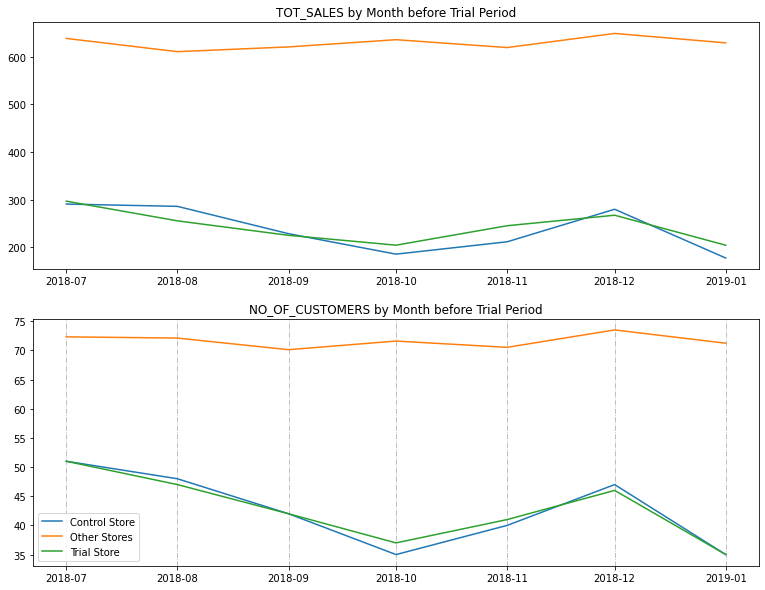

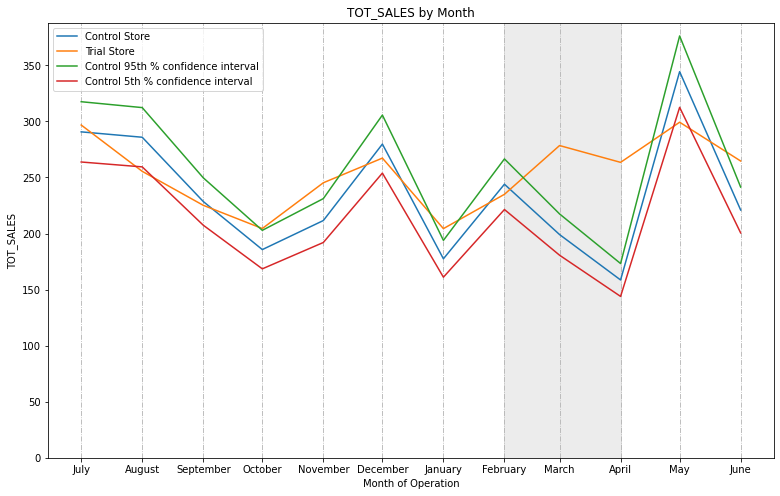

In [33]:
#Lets Verify if it gives the same val as our previous 
trial_store = 77

#General Store Assessment and attain control store
table_combined = evalMetrics(trial_store)

control_store  = returnControlStore(table_combined)

#COMpare trial and control store metrics
print(compareMetrics())

### GENERAL ASSESSMENT of trial and control stores
#preTRIALS =  metrics before the trical
#measureovertime_target = metrics for entire duration(before , during and after trials)
preTRIALS, measureovertime_target = StoreAssessment(trial_store,control_store)

#### STORE 77 ASESSMENT OF TOTAL SALES
metric = 'TOT_SALES'
#compute scaling factor
scalingFactor = computeScalingFactor(metric)
#compute standard deviation and scaling factor 
stdDev = applyScalingFactor(metric)

# Find the 95th percentile of the t distribution with dof = 7
dof = 7
t.isf(0.05, dof)
# Comment: We can see that the t-value is much larger than the 95th percentile value of the t-distribution for March and April
#find the 95th percentile
visualizeEffects('TOT_SALES')

# It works!!!!
SO i should continue for number of customers 
### STORE 77 NUMBER OF CUSTOMERS 
We will begin with scaling the control store's sales to a level similar to control for any differences between the two stores outside of the trial period
#### Scale pre-trial control NUMBER OF CUSTOMERS to match pre-trial trial store sales

In [34]:
metric =  'NO_OF_CUSTOMERS'
#compute scaling factor 
scalingFactor = computeScalingFactor(metric)
scalingFactor

1.0033557046979866

In [35]:
#compute standard deviation and scaling factor 
stdDev = applyScalingFactor(metric)

7     0.198043
8    14.556162
9    33.244822
Name: tValue, dtype: float64


In [36]:
stdDev

0.016887651650119434

In [37]:
#compute the t value for the 9th percentile
t.isf(0.05, dof)
# Comment: We can see that the t-value is much larger than the 95th percentile value of the t-distribution for March and April

1.8945786050613054

Store_Type  Control Store  Trial Store  Control 95th % confidence interval  \
DATE                                                                         
2018-07-01             51           51                           52.722540   
2018-08-01             48           47                           49.621215   
2018-09-01             42           42                           43.418563   
2018-10-01             35           37                           36.182136   
2018-11-01             40           41                           41.351012   

Store_Type  Control 5th % confidence interval  
DATE                                           
2018-07-01                          49.277460  
2018-08-01                          46.378785  
2018-09-01                          40.581437  
2018-10-01                          33.817864  
2018-11-01                          38.648988  


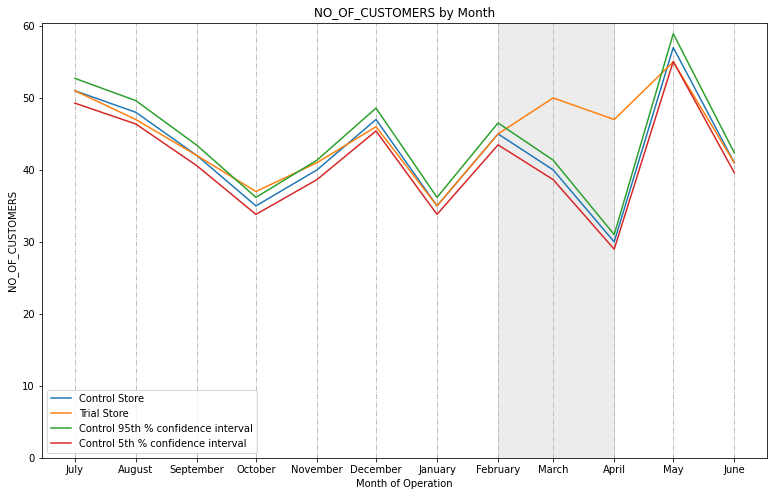

In [38]:
visualizeEffects(metric)

The results show that the trial in store 77 is significantly different to its control store in the trial period as the trial store performance(Number of Customers) lies outside the 5% to 95% confidence interval of the control store in two of the three trial months.

# STORE 86

In [39]:
trial_store = 86
#General Store Assessment and attain control store
table_combined = evalMetrics(trial_store)
table_combined.head()

   Trial_Store  STORE_NBR  ave_scoreTOT_SALES  ave_scoreNO_OF_CUSTOMERS
0         86.0        1.0            0.466983                  0.498018
1         86.0        2.0           -0.041352                  0.171205


,Trial_Store,STORE_NBR,ave_scoreTOT_SALES,ave_scoreNO_OF_CUSTOMERS
0,86.0,1.0,0.466983,0.498018
1,86.0,2.0,-0.041352,0.171205
2,86.0,3.0,0.123116,0.104620
3,86.0,4.0,0.298309,0.184103
4,86.0,5.0,0.407497,0.230528


In [40]:
control_store  = returnControlStore(table_combined)

print(f'Trial Store   : {trial_store} ')
print(f'Control Store : {control_store}')

     Trial_Store  STORE_NBR  resultant_score
147         86.0      155.0         0.770724
102         86.0      109.0         0.719826
107         86.0      114.0         0.647389
213         86.0      225.0         0.643099
130         86.0      138.0         0.626930
Trial Store   : 86 
Control Store : 155


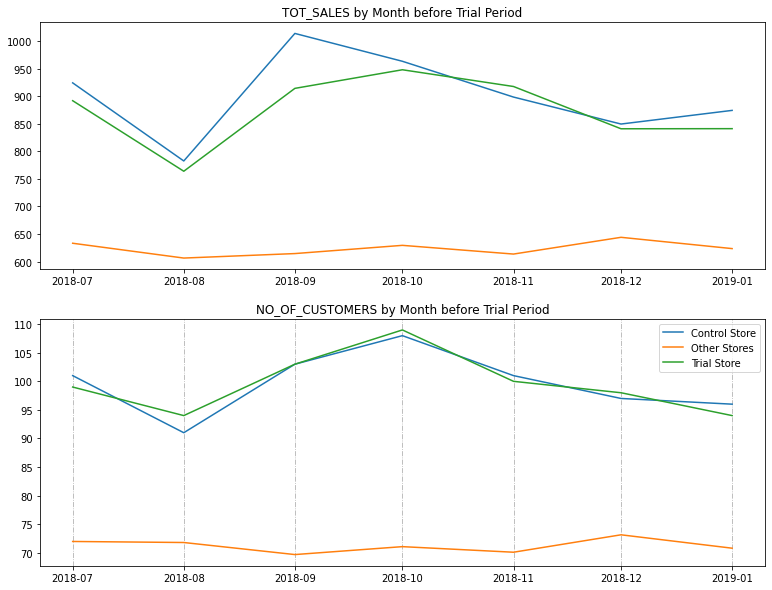

In [41]:
#COMpare trial and control store metrics
compareMetrics()

In [42]:
### GENERAL ASSESSMENT of trial and control stores
#preTRIALS =  metrics before the trical
#measureovertime_target = metrics for entire duration(before , during and after trials)
preTRIALS, measureovertime_target = StoreAssessment(trial_store,control_store)
measureovertime_target.head()

   STORE_NBR       DATE  TOT_SALES  NO_OF_CUSTOMERS  CHIPS_PER_CUSTOMER  \
0         86 2018-07-01     892.20               99            2.535354   
1         86 2018-08-01     764.05               94            2.287234   
2         86 2018-09-01     914.60              103            2.504854   
3         86 2018-10-01     948.40              109            2.532110   
4         86 2018-11-01     918.00              100            2.540000   

   Ave_unit_Cost  chips_per_transc   Store_Type  
0       3.554582          1.992063  Trial Store  
1       3.553721          1.954545  Trial Store  
2       3.544961          2.015625  Trial Store  
3       3.436232          2.000000  Trial Store  
4       3.614173          2.032000  Trial Store  


,STORE_NBR,DATE,TOT_SALES,NO_OF_CUSTOMERS,CHIPS_PER_CUSTOMER,Ave_unit_Cost,chips_per_transc,Store_Type
0,86,2018-07-01,892.20,99,2.535354,3.554582,1.992063,Trial Store
1,86,2018-08-01,764.05,94,2.287234,3.553721,1.954545,Trial Store
2,86,2018-09-01,914.60,103,2.504854,3.544961,2.015625,Trial Store
3,86,2018-10-01,948.40,109,2.532110,3.436232,2.000000,Trial Store
4,86,2018-11-01,918.00,100,2.540000,3.614173,2.032000,Trial Store


## STORE 86 ASESSMENT OF TOTAL SALES

In [43]:
metric = 'TOT_SALES'
#compute scaling factor
scalingFactor = computeScalingFactor(metric)

In [44]:
#compute standard deviation and scaling factor 
stdDev = applyScalingFactor(metric)

7     2.354174
8    13.206585
9     1.473915
Name: tValue, dtype: float64


In [45]:
# Find the 95th percentile of the t distribution with dof = 7
dof = 7
t.isf(0.05, dof)
# Comment: We can see that the t-value is much larger than the 95th percentile value of the t-distribution for March and April
#find the 95th percentile

1.8945786050613054

Store_Type  Control Store  Trial Store  Control 95th % confidence interval  \
DATE                                                                         
2018-07-01          924.6       892.20                          968.828413   
2018-08-01          782.7       764.05                          820.140600   
2018-09-01         1014.4       914.60                         1062.924012   
2018-10-01          963.8       948.40                         1009.903552   
2018-11-01          898.8       918.00                          941.794265   

Store_Type  Control 5th % confidence interval  
DATE                                           
2018-07-01                         880.371587  
2018-08-01                         745.259400  
2018-09-01                         965.875988  
2018-10-01                         917.696448  
2018-11-01                         855.805735  


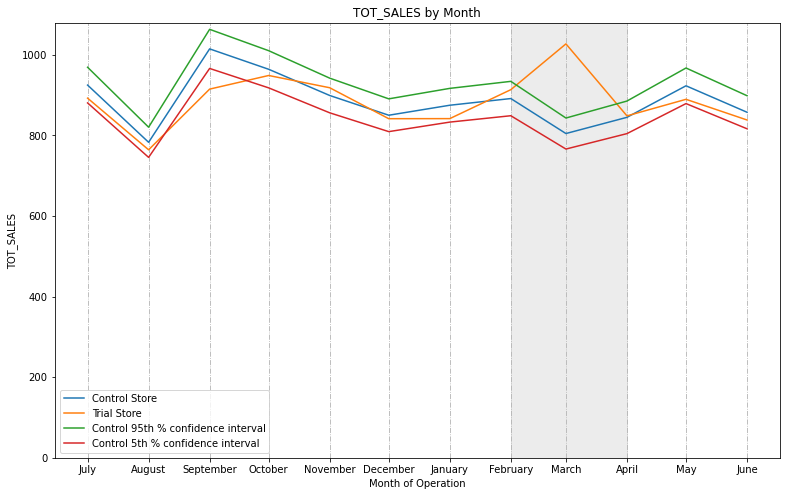

In [46]:
visualizeEffects(metric)

The results show that the trial in store 86 is not significantly different to its
control store(115) in the trial period as the trial store performance(Total Sales) lies inside the 5%
to 95% confidence interval of the control store in two of the three trial months.

## STORE 86 ASESSMENT OF NUMBER OF CUSTOMERS 

In [47]:
metric =  'NO_OF_CUSTOMERS'
#compute scaling factor 
scalingFactor = computeScalingFactor(metric)
scalingFactor

1.0

In [48]:
#compute standard deviation and scaling factor 
stdDev = applyScalingFactor(metric)

7    12.766068
8    22.578285
9     6.125134
Name: tValue, dtype: float64


In [49]:
stdDev

0.009894651119759365

In [50]:
# Find the 95th percentile of the t distribution with dof = 7
dof = 7
t.isf(0.05, dof)
# Comment: We can see that the t-value is much larger than the 95th percentile value of the t-distribution for March and April
#find the 95th percentile

1.8945786050613054

Store_Type  Control Store  Trial Store  Control 95th % confidence interval  \
DATE                                                                         
2018-07-01            101           99                          102.998720   
2018-08-01             91           94                           92.800827   
2018-09-01            103          103                          105.038298   
2018-10-01            108          109                          110.137245   
2018-11-01            101          100                          102.998720   

Store_Type  Control 5th % confidence interval  
DATE                                           
2018-07-01                          99.001280  
2018-08-01                          89.199173  
2018-09-01                         100.961702  
2018-10-01                         105.862755  
2018-11-01                          99.001280  


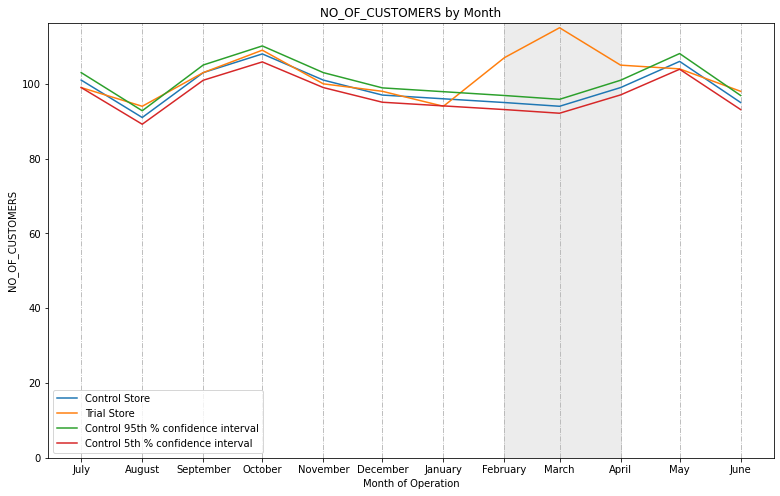

In [51]:
visualizeEffects(metric)

It looks like the number of customers is significantly higher in all of the three months. This seems to suggest that the trial had a significant impact on increasing the number of customers in trial store 86 but as we saw, sales were not significantly higher. We should check with the Category Manager if there were special deals in the trial store that were may have resulted in lower prices, impacting the results.

# STORE 88

In [52]:
trial_store = 88
#General Store Assessment and attain control store
table_combined = evalMetrics(trial_store)
table_combined.head()

   Trial_Store  STORE_NBR  ave_scoreTOT_SALES  ave_scoreNO_OF_CUSTOMERS
0         88.0        1.0            0.681297                  0.331238
1         88.0        2.0            0.236643                 -0.083332


,Trial_Store,STORE_NBR,ave_scoreTOT_SALES,ave_scoreNO_OF_CUSTOMERS
0,88.0,1.0,0.681297,0.331238
1,88.0,2.0,0.236643,-0.083332
2,88.0,3.0,-0.024869,0.603279
3,88.0,4.0,-0.130559,0.108210
4,88.0,5.0,0.343370,0.266561


In [53]:
control_store  = returnControlStore(table_combined)
print()
print(f'Trial Store :{trial_store} ')
print(f'Control Store : {control_store}')

     Trial_Store  STORE_NBR  resultant_score
170         88.0      178.0         0.679316
12          88.0       14.0         0.665919
126         88.0      134.0         0.657619
225         88.0      237.0         0.614604
179         88.0      187.0         0.605656

Trial Store :88 
Control Store : 178


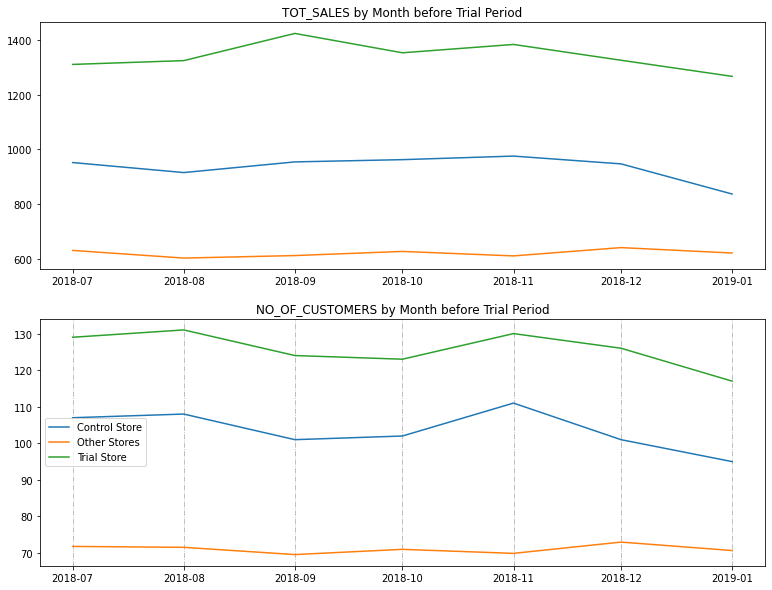

In [54]:
#COMpare trial and control store metrics
compareMetrics()

- control store 178 does not seem like he best fit
- lets iterate over the best five if we can find a suitable control store test most proable control Store = [178,14,134,237,187] 

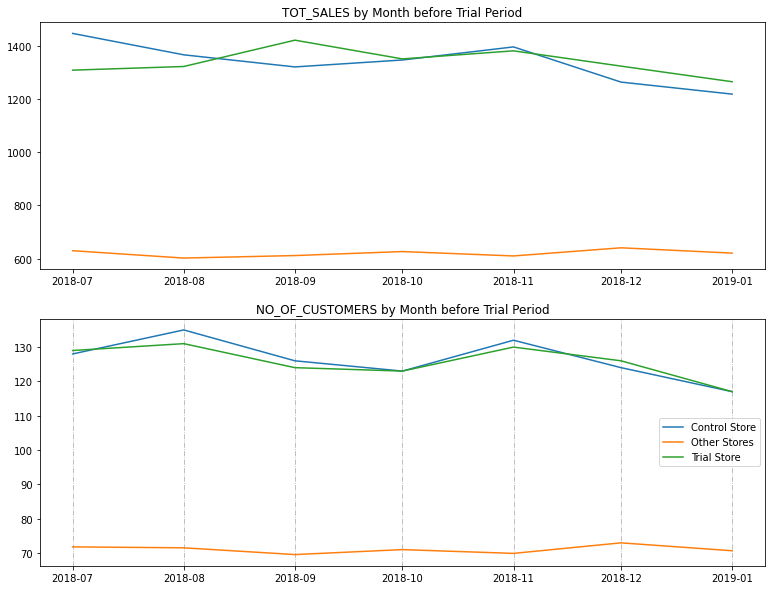

In [55]:
control_store = 237
compareMetrics()
#Store 237 is the most proable to be the control store and not 178

In [56]:
### GENERAL ASSESSMENT of trial and control stores
#preTRIALS =  metrics before the trical
#measureovertime_target = metrics for entire duration(before , during and after trials)
preTRIALS, measureovertime_target = StoreAssessment(trial_store,control_store)
measureovertime_target.head()

   STORE_NBR       DATE  TOT_SALES  NO_OF_CUSTOMERS  CHIPS_PER_CUSTOMER  \
0         88 2018-07-01     1310.0              129            2.372093   
1         88 2018-08-01     1323.8              131            2.312977   
2         88 2018-09-01     1423.0              124            2.564516   
3         88 2018-10-01     1352.4              123            2.569106   
4         88 2018-11-01     1382.8              130            2.415385   

   Ave_unit_Cost  chips_per_transc   Store_Type  
0       4.281046          2.000000  Trial Store  
1       4.368977          1.917722  Trial Store  
2       4.474843          2.025478  Trial Store  
3       4.279747          2.038710  Trial Store  
4       4.403822          2.012821  Trial Store  


,STORE_NBR,DATE,TOT_SALES,NO_OF_CUSTOMERS,CHIPS_PER_CUSTOMER,Ave_unit_Cost,chips_per_transc,Store_Type
0,88,2018-07-01,1310.0,129,2.372093,4.281046,2.000000,Trial Store
1,88,2018-08-01,1323.8,131,2.312977,4.368977,1.917722,Trial Store
2,88,2018-09-01,1423.0,124,2.564516,4.474843,2.025478,Trial Store
3,88,2018-10-01,1352.4,123,2.569106,4.279747,2.038710,Trial Store
4,88,2018-11-01,1382.8,130,2.415385,4.403822,2.012821,Trial Store


## STORE 88 ASESSMENT OF TOTAL SALES

In [57]:
metric = 'TOT_SALES'
#compute scaling factor
scalingFactor = computeScalingFactor(metric)

In [58]:
#compute standard deviation and scaling factor 
stdDev = applyScalingFactor(metric)

7    0.843868
8    7.124136
9    6.230721
Name: tValue, dtype: float64


In [59]:
# Find the 95th percentile of the t distribution with dof = 7
dof = 7
t.isf(0.05, dof)
# Comment: We can see that the t-value is much larger than the 95th percentile value of the t-distribution for March and April
#find the 95th percentile

1.8945786050613054

Store_Type  Control Store  Trial Store  Control 95th % confidence interval  \
DATE                                                                         
2018-07-01         1448.4       1310.0                         1538.157998   
2018-08-01         1367.8       1323.8                         1452.563179   
2018-09-01         1322.2       1423.0                         1404.137327   
2018-10-01         1348.3       1352.4                         1431.854756   
2018-11-01         1397.6       1382.8                         1484.209899   

Store_Type  Control 5th % confidence interval  
DATE                                           
2018-07-01                        1358.642002  
2018-08-01                        1283.036821  
2018-09-01                        1240.262673  
2018-10-01                        1264.745244  
2018-11-01                        1310.990101  


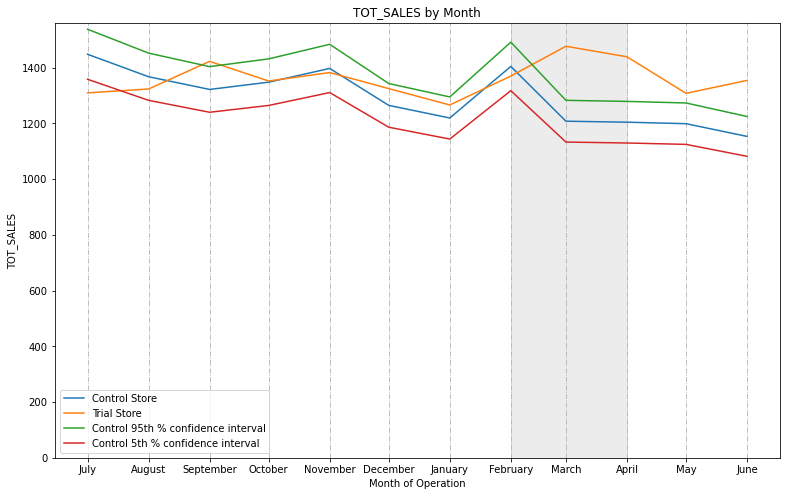

In [60]:
visualizeEffects(metric)

The results show that the trial in store 88 is significantly different to its control store(237) in the trial period as the trial store performance lies outside of the 5% to 95% confidence interval of the control store in two of the three trial months

## STORE 88 ASESSMENT OF NUMBER OF CUSTOMERS 

In [61]:
metric =  'NO_OF_CUSTOMERS'
#compute scaling factor 
scalingFactor = computeScalingFactor(metric)
scalingFactor

0.9943502824858758

In [62]:
#compute standard deviation and scaling factor 
stdDev = applyScalingFactor(metric)

7     1.498623
8    19.305795
9    10.600788
Name: tValue, dtype: float64


In [63]:
stdDev

0.006860553165377127

In [64]:
# Find the 95th percentile of the t distribution with dof = 7
dof = 7
t.isf(0.05, dof)
# Comment: We can see that the t-value is much larger than the 95th percentile value of the t-distribution for March and April
#find the 95th percentile

1.8945786050613054

Store_Type  Control Store  Trial Store  Control 95th % confidence interval  \
DATE                                                                         
2018-07-01            128          129                          129.756302   
2018-08-01            135          131                          136.852349   
2018-09-01            126          124                          127.728859   
2018-10-01            123          123                          124.687696   
2018-11-01            132          130                          133.811186   

Store_Type  Control 5th % confidence interval  
DATE                                           
2018-07-01                         126.243698  
2018-08-01                         133.147651  
2018-09-01                         124.271141  
2018-10-01                         121.312304  
2018-11-01                         130.188814  


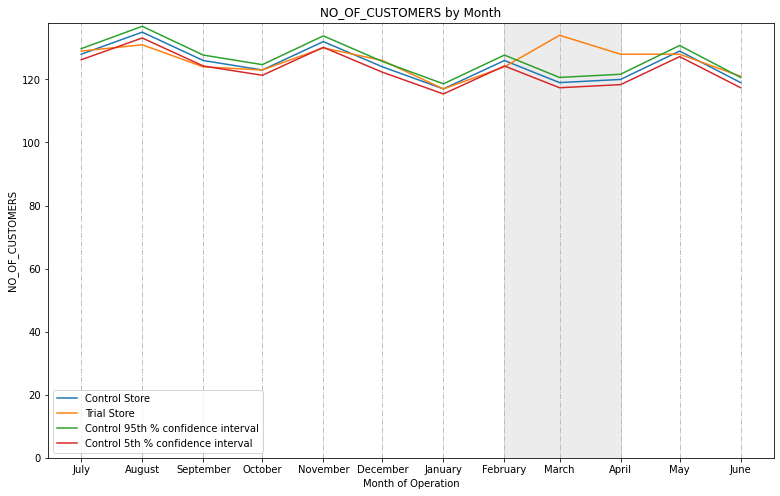

In [65]:
visualizeEffects(metric)

Total number of customers in the trial period for the trial store is significantly higher than the control store for two out of three months, which indicates a positive trial effect.

# CONCLUSION

We've found control stores 233, 155, 237 for trial stores 77, 86 and 88 respectively. The results for trial stores 77 and 88 during the trial period show a significant difference in at least two of the three trial months but this is not the case for trial store 86. We can check with the client if the implementation of the trial was different in trial store 86 but overall, the trial shows a significant increase in sales. Now that we have finished our analysis, we can prepare our presentation to the Category Manager.